In [48]:
!cp -r /kaggle/input/playground-series-s4e2 /kaggle/working/

In [49]:
%ls

sample_submission.csv  test.csv  train.csv


In [50]:
%cd playground-series-s4e2/

[Errno 2] No such file or directory: 'playground-series-s4e2/'
/kaggle/working/playground-series-s4e2


In [128]:
import pandas as pd

df = pd.read_csv("train.csv", index_col = "id")

In [129]:
test = pd.read_csv("/kaggle/working/playground-series-s4e2/test.csv", index_col = "id")

In [130]:
test.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [131]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             20758

In [133]:
df["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [134]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [135]:
numeric_cols = df.columns[df.dtypes == "float64"]
test_numeric = test.columns[test.dtypes == "float64"]

In [136]:
category_cols = df.columns[df.dtypes == "object"]
test_category = test.columns[test.dtypes == "object"]

In [138]:
for col in category_cols:
    print(df[col].unique(), col)

['Male' 'Female'] Gender
['yes' 'no'] family_history_with_overweight
['yes' 'no'] FAVC
['Sometimes' 'Frequently' 'no' 'Always'] CAEC
['no' 'yes'] SMOKE
['no' 'yes'] SCC
['Sometimes' 'no' 'Frequently'] CALC
['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike'] MTRANS
['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I'] NObeyesdad


<Axes: >

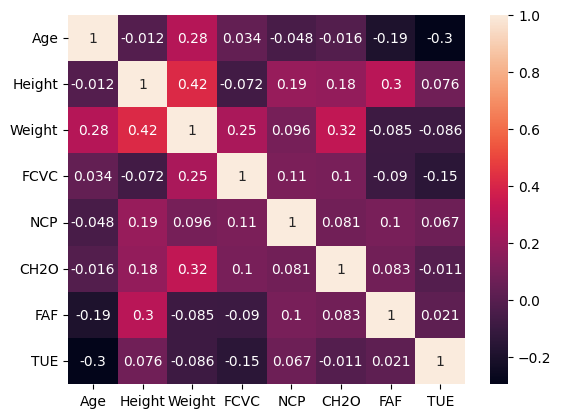

In [107]:
import seaborn as sns

sns.heatmap(df[numeric_cols].corr(), annot = True)

In [108]:
for col in df.columns:
    print(df[col].dtype, df[col].nunique(),col, sep = "\t\t")    

object		2		Gender
float64		1703		Age
float64		1833		Height
float64		1979		Weight
object		2		family_history_with_overweight
object		2		FAVC
float64		934		FCVC
float64		689		NCP
object		4		CAEC
object		2		SMOKE
float64		1506		CH2O
object		2		SCC
float64		1360		FAF
float64		1297		TUE
object		3		CALC
object		5		MTRANS
object		7		NObeyesdad


In [109]:
for col in category_cols:
    if col == "NObeyesdad":
        continue
    dummie = pd.get_dummies(df[col], drop_first = True, dtype = "int64", prefix = col)
    df = pd.concat([df, dummie], axis = 1)
    df.drop(col, axis = 1, inplace = True)
target = df[["NObeyesdad"]]
df.drop("NObeyesdad", axis = 1, inplace = True)
df = pd.concat([df, target], axis = 1)

In [110]:
for col in test_category:
    dummie = pd.get_dummies(test[col], drop_first = True, dtype = "int64", prefix = col)
    test = pd.concat([test, dummie], axis = 1)
    test.drop(col, axis = 1, inplace = True)

In [111]:
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
id,,,,,,,,,,,,,,,,,,,,,
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1,1,...,0,0,0,1,0,0,0,1,0,Overweight_Level_II
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0,1,...,0,0,0,0,1,0,0,0,0,Normal_Weight
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,1,...,0,0,0,0,1,0,0,1,0,Insufficient_Weight
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,0,1,...,0,0,0,1,0,0,0,1,0,Obesity_Type_III
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1,1,...,0,0,0,1,0,0,0,1,0,Overweight_Level_II


In [112]:
test.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
id,,,,,,,,,,,,,,,,,,,,,
20758,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,1,1,...,0,0,0,0,1,0,0,0,1,0
20759,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,0,1,...,0,0,0,0,1,0,0,0,1,0
20760,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,0,1,...,0,0,0,0,1,0,0,0,1,0
20761,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,1,1,...,0,0,0,0,1,0,0,0,1,0
20762,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,0,1,...,0,0,0,0,1,0,0,0,1,0


In [113]:
df.shape

(20758, 23)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


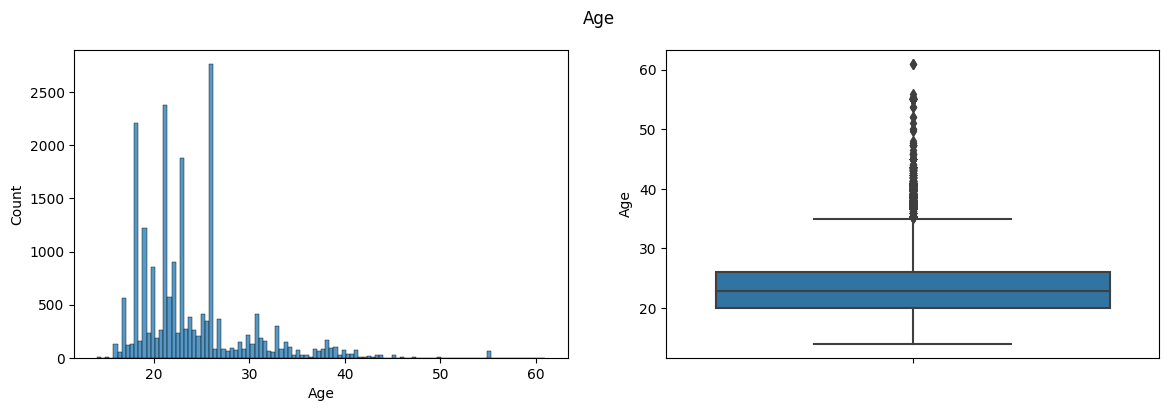

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


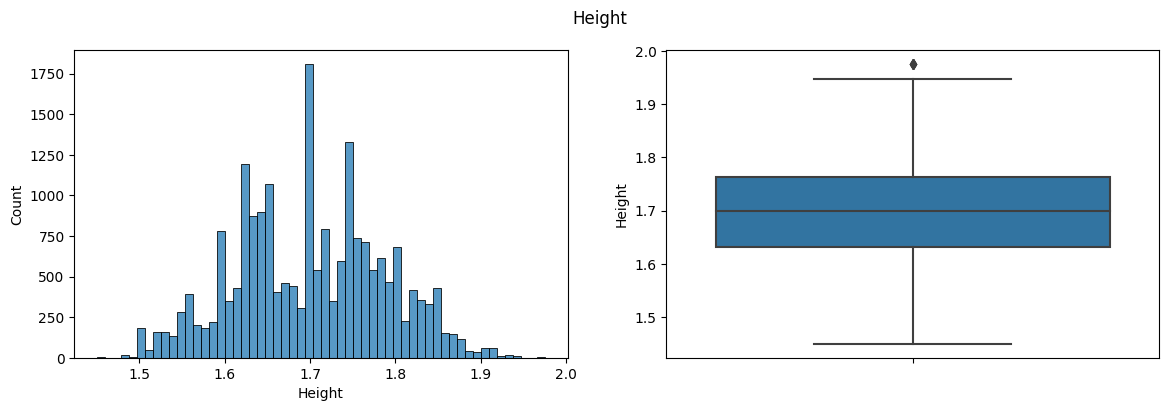

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


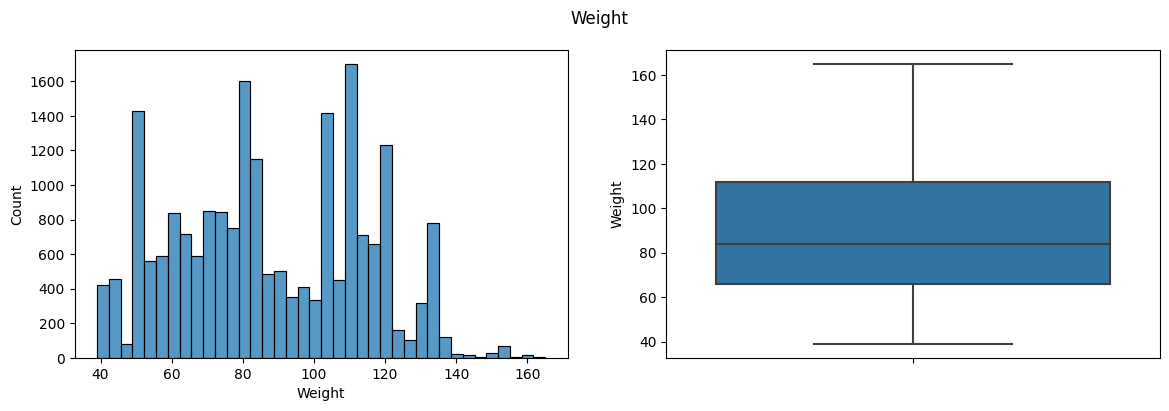

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


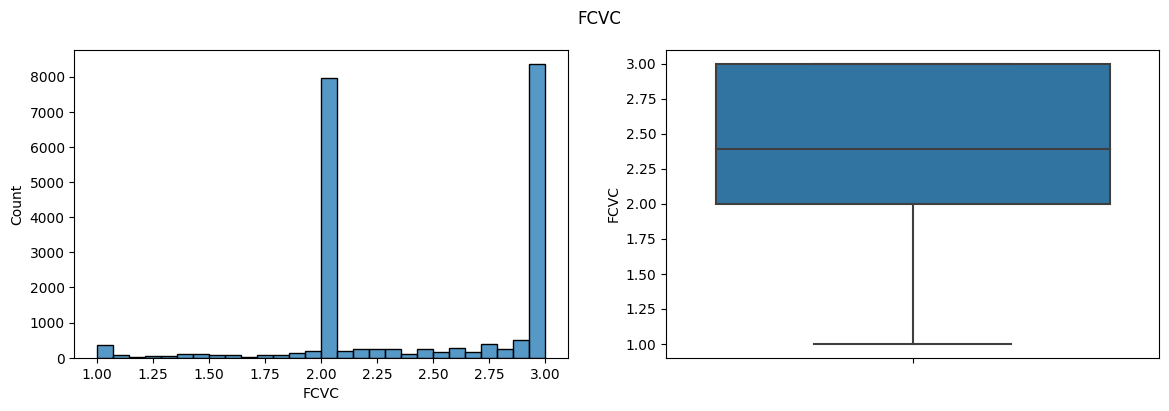

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


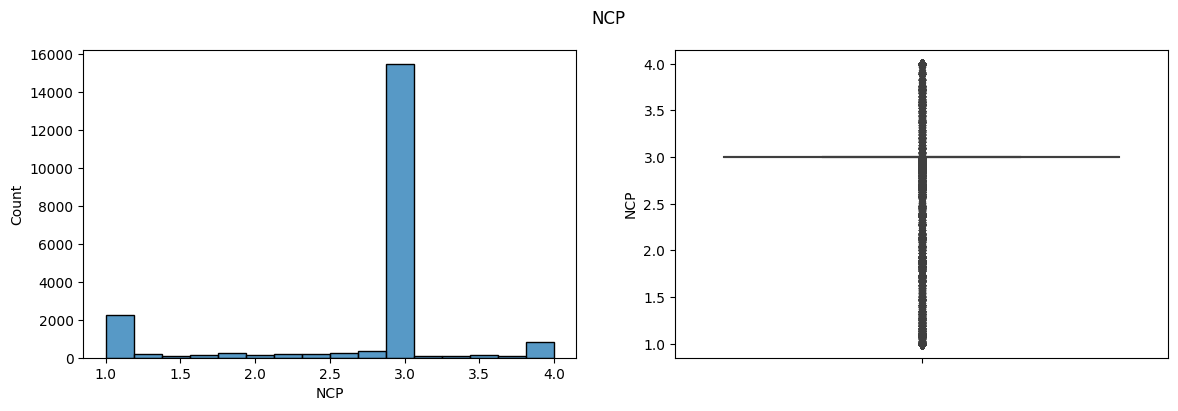

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


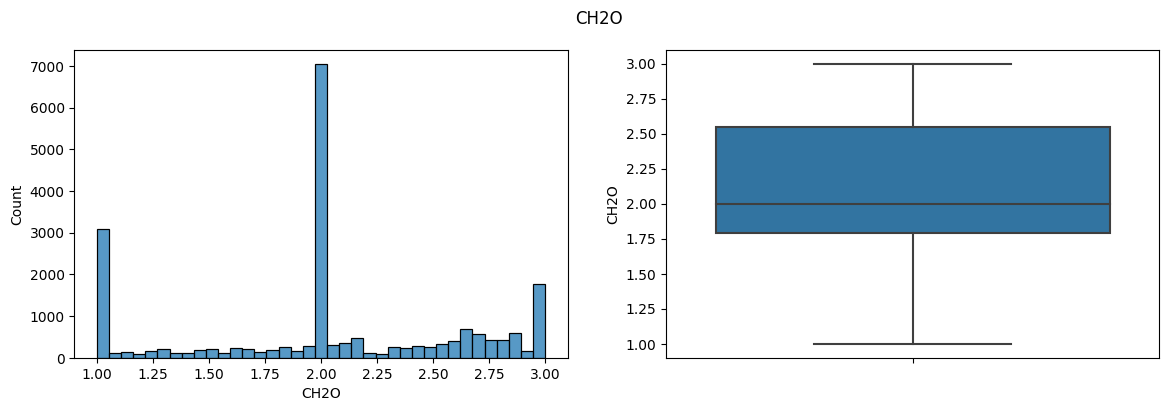

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


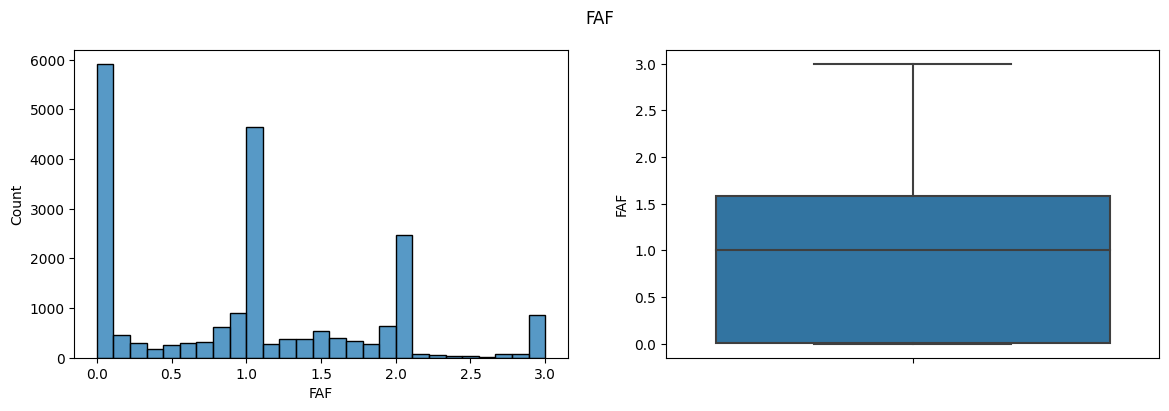

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


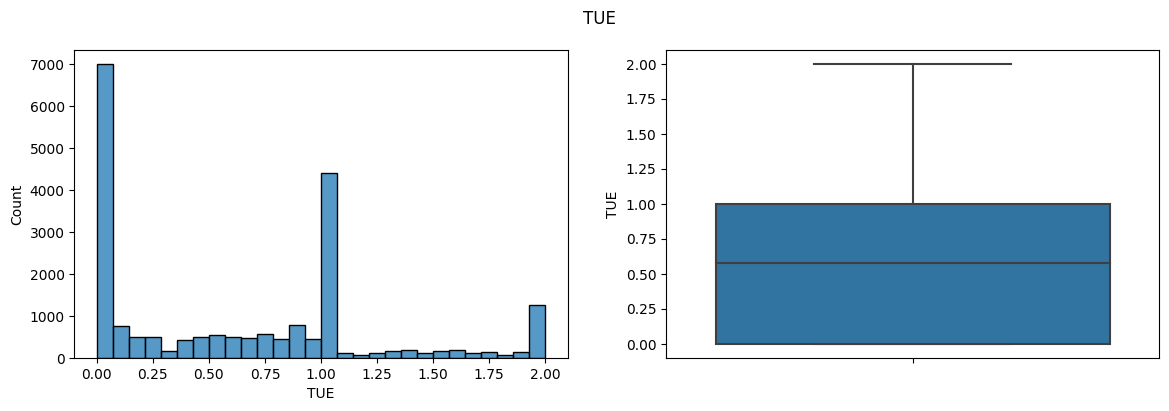

In [114]:
import matplotlib.pyplot as plt

for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize = (14, 4))
    sns.histplot(x = col, data = df, ax = ax[0])
    sns.boxplot(y = col, data = df, ax = ax[1])
    fig.suptitle(col)
    plt.show()
    

In [76]:
test.drop("CALC_Frequently", axis = 1, inplace = True)

In [77]:
df.to_csv('/kaggle/working/data.csv')

In [78]:
test.to_csv("/kaggle/working/test.csv")

In [115]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from torch.utils.data import random_split

In [80]:
class Trainset(Dataset):
    def __init__(self, filepath, categories):
        data = pd.read_csv(filepath, index_col = "id")
        self.data = data
        self.categories = categories
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.categories)}
            
    def __len__(self):
        return len(self.data)
    def __getitem__(self, index):
        features = self.data.iloc[index, :-1]
        features = torch.tensor(features.values.astype(float), dtype=torch.float)
        target = self.data.iloc[index, -1]
        encoded_target = self.class_to_idx[target]
        encoded_target = torch.tensor(encoded_target, dtype = torch.long)
        return features, encoded_target

In [81]:
class Testset(Dataset):
    def __init__(self, filepath):
        self.data = pd.read_csv(filepath, index_col = "id")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        features = self.data.iloc[index]
        idx = self.data.index[index]
        features = torch.tensor(features.values.astype(float), dtype=torch.float)
        return idx, features


In [121]:
categories = [
    'Obesity_Type_III', 'Obesity_Type_II', 'Normal_Weight',
    'Obesity_Type_I', 'Insufficient_Weight',
    'Overweight_Level_II', 'Overweight_Level_I'
]
train_data = Trainset("/kaggle/working/data.csv", categories = categories)
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_dataset, val_dataset = random_split(train_data, [train_size, val_size])

In [122]:
train_loader = DataLoader(train_dataset, batch_size=128, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, num_workers=4)

In [84]:
import torch.nn as nn
import torch.nn.functional as F

In [85]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(22, 100)
        self.bn1 = nn.BatchNorm1d(100)
        self.d1 = nn.Dropout(0.3)
        
        self.fc2 = nn.Linear(100, 200)
        self.bn2 = nn.BatchNorm1d(200)
        self.d2 = nn.Dropout(0.4)
        
        self.fc3 = nn.Linear(200, 100)
        self.bn3 = nn.BatchNorm1d(100)
        self.d3 = nn.Dropout(0.4)
        
        self.fc4 = nn.Linear(100, 7)

    def forward(self, x):

        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.d1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.d2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.d3(x)

        x = self.fc4(x)
        return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=22, out_features=100, bias=True)
  (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (d1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=100, out_features=200, bias=True)
  (bn2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (d2): Dropout(p=0.4, inplace=False)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (bn3): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (d3): Dropout(p=0.4, inplace=False)
  (fc4): Linear(in_features=100, out_features=7, bias=True)
)


In [86]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [123]:
n_epochs = 25

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(n_epochs):
    running_loss = 0
    correct_train = 0
    total_train = 0
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * data.size(0)
        preds = output.argmax(dim=1)
        correct_train += (preds == target).sum().item()
        total_train += target.size(0)

    train_loss = running_loss / total_train
    train_acc = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    

    model.eval()
    running_val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            loss = criterion(output, target)
            running_val_loss += loss.item() * data.size(0)
            preds = output.argmax(dim=1)
            correct_val += (preds == target).sum().item()
            total_val += target.size(0)

    val_loss = running_val_loss / total_val
    val_acc = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f'Epoch {epoch} : Train Loss {train_loss}, Val Loss: {val_loss}')

Epoch 0 : Train Loss 0.3555350207798028, Val Loss: 0.30667429919723416
Epoch 1 : Train Loss 0.3509503831397772, Val Loss: 0.3049335183230019
Epoch 2 : Train Loss 0.35125417751246274, Val Loss: 0.3186388195754311
Epoch 3 : Train Loss 0.350162619085341, Val Loss: 0.31348403811980635
Epoch 4 : Train Loss 0.34722409279508337, Val Loss: 0.3322127503502519
Epoch 5 : Train Loss 0.34260236739333555, Val Loss: 0.32979879140206664
Epoch 6 : Train Loss 0.34732229218659355, Val Loss: 0.3166206930101949
Epoch 7 : Train Loss 0.3394550907931185, Val Loss: 0.3197582116724072
Epoch 8 : Train Loss 0.3425563363537105, Val Loss: 0.36229876344148126
Epoch 9 : Train Loss 0.34370990671091656, Val Loss: 0.3159765137993444
Epoch 10 : Train Loss 0.3384825219604475, Val Loss: 0.33438001018400554
Epoch 11 : Train Loss 0.3441068851721239, Val Loss: 0.32451173356722524
Epoch 12 : Train Loss 0.33862806130726847, Val Loss: 0.30654605273517627
Epoch 13 : Train Loss 0.33778065033689997, Val Loss: 0.3090724693462733
Epo

In [139]:
train_accuracies[-1]

0.881394756935607

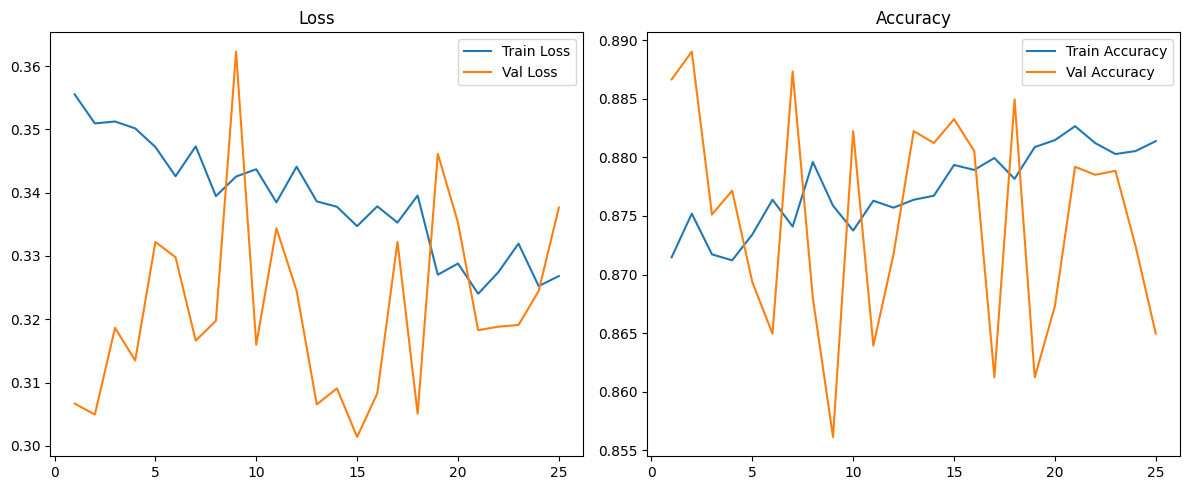

In [125]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, n_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, n_epochs+1), val_losses, label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, n_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, n_epochs+1), val_accuracies, label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Я пробовал подбирать разные соотношения обучающей и валидационной выборки, но на валидации
# она так или иначе скачет

In [88]:
test_data = Testset("/kaggle/working/test.csv")

In [89]:
test_loader = DataLoader(test_data, batch_size=128, num_workers=4)

In [90]:
model.eval()

all_ids = []
all_preds = []

with torch.no_grad():
    for batch in test_loader:
        ids, features = batch  
        outputs = model(features)
        preds = torch.argmax(outputs, dim=1)
        
        all_ids.extend(ids.numpy().tolist())
        all_preds.extend(preds.numpy().tolist())

label_mapping = {
    'Obesity_Type_III': 0,
    'Obesity_Type_II': 1,
    'Normal_Weight': 2,
    'Obesity_Type_I': 3,
    'Insufficient_Weight': 4,
    'Overweight_Level_II': 5,
    'Overweight_Level_I': 6
}
inv_label_mapping = {v: k for k, v in label_mapping.items()}
decoder_preds = [inv_label_mapping[p] for p in all_preds]

submission = pd.DataFrame({
    'id': all_ids,
    'NObeyesdad': decoder_preds
})

submission.to_csv('submission.csv', index=False)